Project Math 328

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [56]:
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [57]:
stroke.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [58]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [59]:
stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [60]:
stroke2 = stroke.copy()
stroke2['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

<ipython-input-60-c6d50fa40260>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke2['bmi'].fillna(stroke['bmi'].mean(),inplace=True)


In [15]:
stroke2.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [17]:
stroke2.duplicated().sum()

np.int64(0)

Milestone 4:  The data cleaning process involved addressing missing BMI values to maintain data integrity while keeping the entire sample size  intact. The analysis showed that 201 rows (3.9% of the total  5,110 records) had missing BMI values. The missing values were replaced with the calculated mean BMI value of  28.89 which was derived from the 4,909 complete records. The imputation method  was suitable because the missing data percentage was small and BMI values followed a normal distribution and statistical power needed  to be preserved for all 12 variables in the dataset.



In [61]:
stroke2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
stroke2_dummies = pd.get_dummies(stroke2, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
stroke2_dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,True,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.000000,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.600000,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.600000,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [63]:
stroke2_dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,True,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.000000,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.600000,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.600000,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


**Milestone 5: Single variable distribution plots**


In [64]:
stroke2_dummies_filtered = stroke2_dummies[['age','avg_glucose_level','hypertension','stroke']]
stroke2_dummies_filtered

,age,avg_glucose_level,hypertension,stroke
0,67.0,228.69,0,1
1,61.0,202.21,0,1
2,80.0,105.92,0,1
3,49.0,171.23,0,1
4,79.0,174.12,1,1
...,...,...,...,...
5105,80.0,83.75,1,0
5106,81.0,125.20,0,0
5107,35.0,82.99,0,0
5108,51.0,166.29,0,0


**AGE HISTOGROM PLOT**

Text(0, 0.5, 'number of person')

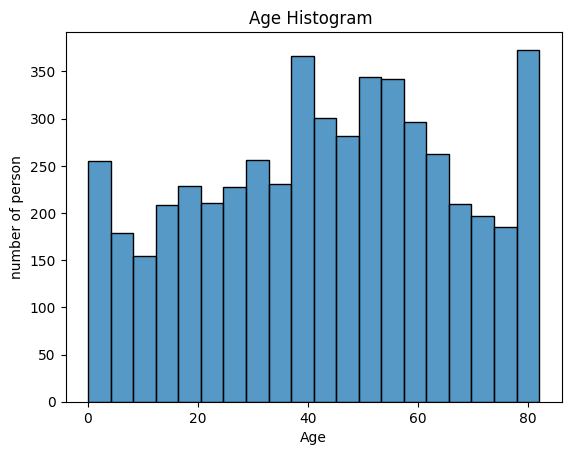

In [65]:
sns.histplot(data=stroke2_dummies_filtered, x="age", bins=20)
plt.title("Age Histogram ")
plt.xlabel("Age")
plt.ylabel("number of person")

**AVERAGE GlUCOSE LEVEL HISTOGRAM PLOT**

Text(0, 0.5, 'number of person')

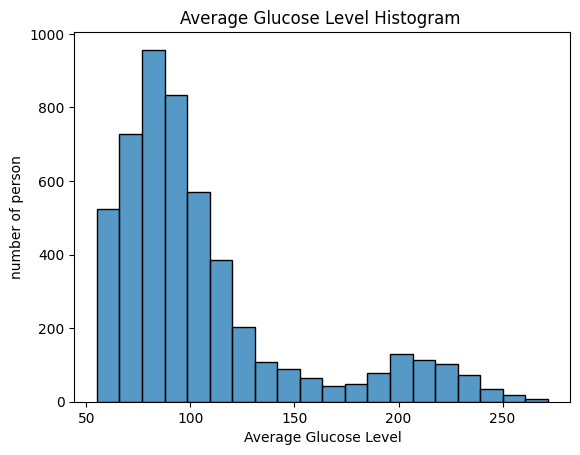

In [66]:
sns.histplot(data=stroke2_dummies_filtered, x="avg_glucose_level", bins=20)
plt.title("Average Glucose Level Histogram ")
plt.xlabel("Average Glucose Level")
plt.ylabel("number of person")

**HYPERTENSION BAR CHART PLOT**

Text(0, 0.5, 'number of person')

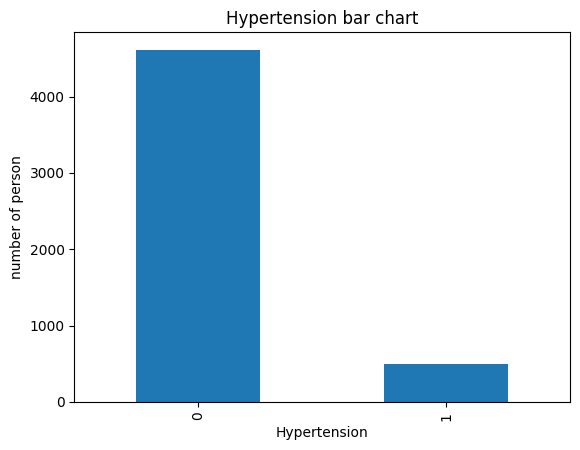

In [67]:
stroke2_dummies_filtered["hypertension"].value_counts().plot(kind="bar")
plt.title("Hypertension bar chart")
plt.xlabel("Hypertension")
plt.ylabel("number of person")


**STROKE BAR CHART PLOT**

Text(0, 0.5, 'number of person')

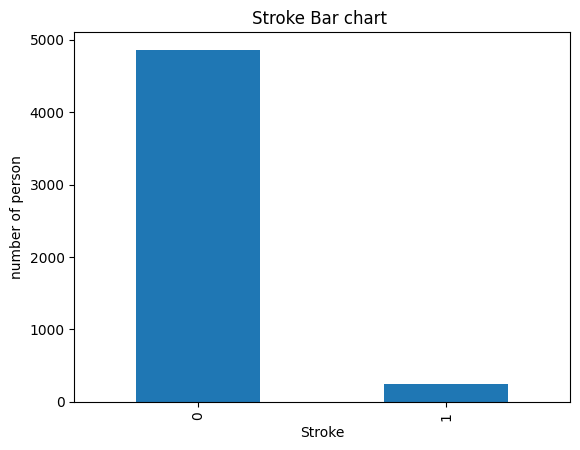

In [68]:
stroke2_dummies_filtered["stroke"].value_counts().plot(kind="bar")
plt.title("Stroke Bar chart ")
plt.xlabel("Stroke")
plt.ylabel("number of person")


**Milestone 6: Multiple variable plots**

**AGE VS. GLUCOSE LEVEL WITH STROKE INDICATOR PLOT**

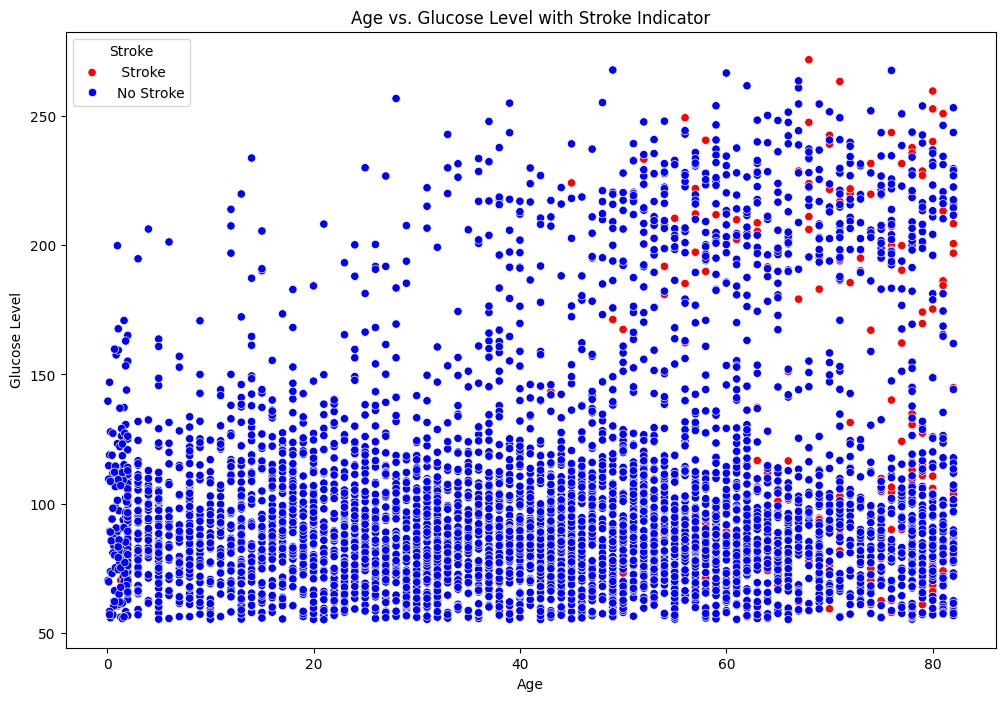

In [69]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="age",
    y="avg_glucose_level",
    hue="stroke",
    data=stroke2_dummies_filtered,
    palette=["blue", "red"]
)
plt.title("Age vs. Glucose Level with Stroke Indicator")
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.legend(title="Stroke", labels=[" Stroke", "No Stroke"])
plt.show()

Key Observations:

1. **Stroke Risk and Age**: The red dots (stroke cases) are more prevalent in higher age ranges, suggesting that the risk of stroke increases significantly with age.

2. **Glucose Level Correlation**: There's a clear trend showing that stroke cases (red dots) tend to cluster at higher glucose levels, particularly above 125, indicating a strong relationship between elevated blood glucose and stroke risk.

3. **Distribution Pattern**: The majority of non-stroke cases (blue dots) are concentrated in lower glucose levels and younger to middle-age ranges, while stroke cases are more scattered and concentrated in older age groups with higher glucose levels.

4. **Variability**: The plot reveals considerable variability in glucose levels across different ages, but with a noticeable trend of increasing glucose levels as age advances.

**Conclusion**: The visualization powerfully illustrates that both advanced age and high glucose levels are significant risk factors for stroke. Patients should be particularly vigilant about managing their blood glucose levels, especially as they get older, as the risk of stroke appears to increase with both age and glucose level elevation.

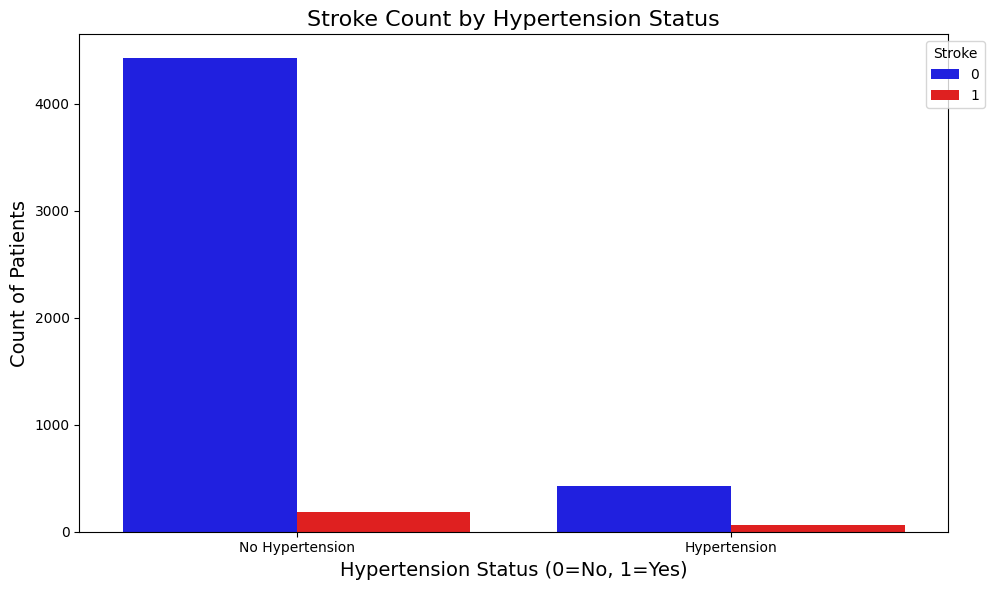

In [70]:
# Create a bar plot of stroke count by hypertension status
plt.figure(figsize=(10, 6))
sns.countplot(
    x="hypertension",
    hue="stroke",
    data=stroke2_dummies_filtered,
    palette=["blue", "red"]
)
plt.title("Stroke Count by Hypertension Status", size=16)
plt.xlabel("Hypertension Status (0=No, 1=Yes)", size=14)
plt.ylabel("Count of Patients", size=14)
plt.xticks([0, 1], ["No Hypertension", "Hypertension"])
plt.legend(title="Stroke", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Key Observations:

1. **Prevalence of Non-Stroke Patients**: The most striking feature is the overwhelmingly high number of patients without a stroke across both hypertension categories, indicating that stroke is a relatively rare event in this dataset.

2. **Hypertension Distribution**: For both stroke and non-stroke groups, there are more patients without hypertension compared to those with hypertension, suggesting that hypertension is not extremely common in this patient population.

3. **Stroke Risk**: While the number of stroke cases is low, there appears to be a slightly higher proportion of stroke cases among patients with hypertension compared to those without, hinting at a potential relationship between hypertension and stroke risk.

4. **Comparative Analysis**: The plot clearly shows that for both hypertension status groups (with and without hypertension), the number of patients who did not have a stroke significantly outweighs those who did have a stroke.

**Conclusion**: The visualization suggests that while hypertension may be a risk factor for stroke, it is not the sole determinant. The low overall stroke count emphasizes the importance of looking at multiple factors when assessing stroke risk, and highlights the need for comprehensive medical evaluation beyond a single health indicator.

**Milestone 7: Model 1 LogisticRegression**

In [71]:
stroke2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [91]:
# Select specific features
#Select 6 variables
X = stroke2_dummies[['age', 'avg_glucose_level', 'bmi', 'hypertension' ,'heart_disease',
                     'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']]
y = stroke2_dummies['stroke']

In [92]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


In [93]:
# Baseline model with default settings
logit = LogisticRegression()
logit.fit(X_train, y_train)


LogisticRegression()

In [94]:
# Testing Set Performance Evaluation
y_pred = logit.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[974,   0],
       [ 48,   0]])

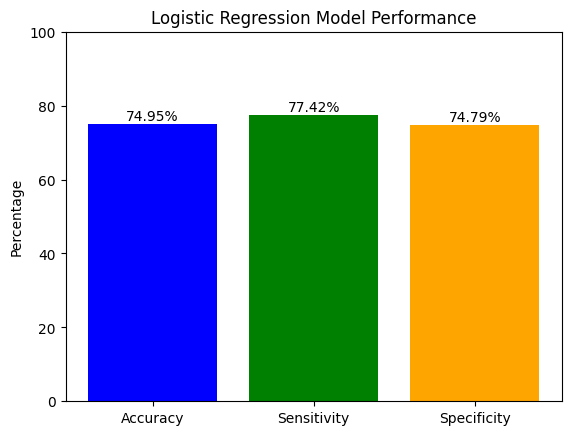

In [95]:
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
values = [74.95, 77.42, 74.79]

plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.ylabel('Percentage')
plt.title('Logistic Regression Model Performance')
plt.ylim(0, 100)
for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v}%', ha='center')
plt.show()

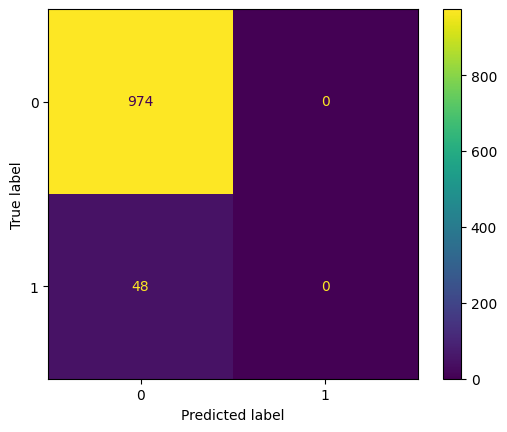

In [96]:

ConfusionMatrixDisplay(confusion_matrix=matrix).plot();

In [78]:
true_neg = matrix[0][0]
true_pos = matrix[1][1]
false_pos =matrix[0][1]
false_neg =matrix[1][0]
Accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
print("\nAccuracy22:",Accuracy)
specificity= true_neg / (true_neg + false_pos)
print("\nSpecificity22:",specificity)
sensitivity=  true_pos / (true_pos + false_neg)
print("\nSensitivity22:",sensitivity)


Accuracy22: 0.952054794520548

Specificity22: 1.0

Sensitivity22: 0.0


In [121]:
# Add parameter class_weight='balanced'
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)
logit2 = LogisticRegression(class_weight='balanced')
logit2.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [122]:
# Training Set Performance Evaluation
y_train_pred = logit2.predict(X_train)
matrix20 = confusion_matrix(y_train, y_train_pred)
matrix20

array([[2841, 1060],
       [  34,  153]])

In [123]:
true_neg20 = matrix20[0][0]
true_pos20 = matrix20[1][1]
false_pos20 =matrix20[0][1]
false_neg20 =matrix20[1][0]
Accuracy20 = (true_pos20 + true_neg20) / (true_pos20 + true_neg20 + false_pos20 + false_neg20)
print("\nAccuracy20:",Accuracy20)
specificity20= true_neg20 / (true_neg20 + false_pos20)
print("\nSpecificity20:",specificity20)
sensitivity20=  true_pos20 / (true_pos20 + false_neg20)
print("\nSensitivity20:",sensitivity20)


Accuracy20: 0.7323874755381604

Specificity20: 0.7282748013329915

Sensitivity20: 0.8181818181818182


In [168]:
#Testing Set Performance Evaluation
y_pred2 = logit2.predict(X_test)
matrix2= confusion_matrix(y_test, y_pred2)
matrix2

array([[718, 242],
       [ 14,  48]])

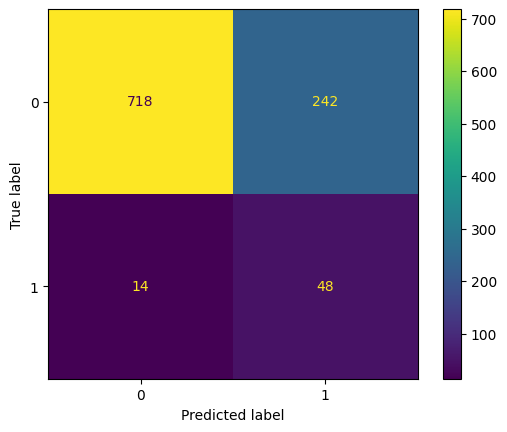

In [125]:

ConfusionMatrixDisplay(confusion_matrix=matrix2).plot();

In [649]:
true_neg2 = matrix2[0][0]
true_pos2 = matrix2[1][1]
false_pos2 =matrix2[0][1]
false_neg2 =matrix2[1][0]
Accuracy2 = (true_pos2 + true_neg2) / (true_pos2 + true_neg2 + false_pos2 + false_neg2)
print("\nAccuracy2:",Accuracy2)
specificity2= true_neg2 / (true_neg2 + false_pos2)
print("\nSpecificity2:",specificity2)
sensitivity2=  true_pos2 / (true_pos2 + false_neg2)
print("\nSensitivity2:",sensitivity2)


Accuracy2: 0.7495107632093934

Specificity2: 0.7479166666666667

Sensitivity2: 0.7741935483870968


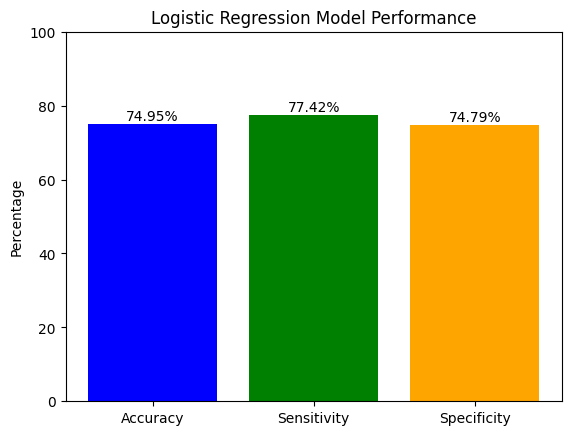

In [89]:
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
values = [74.95, 77.42, 74.79]

plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.ylabel('Percentage')
plt.title('Logistic Regression Model Performance')
plt.ylim(0, 100)
for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v}%', ha='center')
plt.show()

In [81]:
# Add regularization Hyperparameter
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)
param_grid = {'C': [0.01, 0.1, 1,10,100]}

# Create and fit GridSearchCV object
logit3 = GridSearchCV(LogisticRegression(class_weight='balanced'),
                      param_grid)
logit3.fit(X_train, y_train)

# Print the best parameter and evaluate performance
print("Best C:", logit3.best_params_['C'])
y_pred3 = logit3.predict(X_test)

# Assuming you want to print the ROC AUC score for the best model
print(logit3.best_params_['C'], roc_auc_score(y_test, y_pred3))

Best C: 1
1 0.7610551075268817


In [82]:
# Add regularization Hyperparameter
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)
logit3 = LogisticRegression(class_weight='balanced',C=1)
logit3.fit(X_train, y_train)


LogisticRegression(C=1, class_weight='balanced')

In [83]:
# Training Set Performance Evaluation
y_train_pred3 = logit3.predict(X_train)
matrix30 = confusion_matrix(y_train, y_train_pred3)
matrix30

array([[2841, 1060],
       [  34,  153]])

In [131]:
true_neg30 = matrix30[0][0]
true_pos30 = matrix30[1][1]
false_pos30 =matrix30[0][1]
false_neg30 =matrix30[1][0]
Accuracy30 = (true_pos30 + true_neg30) / (true_pos30 + true_neg30 + false_pos30 + false_neg30)
print("\nAccuracy30:",Accuracy30)
specificity30= true_neg30 / (true_neg30 + false_pos30)
print("\nSpecificity30:",specificity30)
sensitivity30=  true_pos30 / (true_pos30 + false_neg30)
print("\nSensitivity30:",sensitivity30)


Accuracy30: 0.7323874755381604

Specificity30: 0.7282748013329915

Sensitivity30: 0.8181818181818182


In [84]:
 #Testing Set Performance Evaluation
y_pred3 = logit3.predict(X_test)
matrix3= confusion_matrix(y_test, y_pred3)
matrix3

array([[718, 242],
       [ 14,  48]])

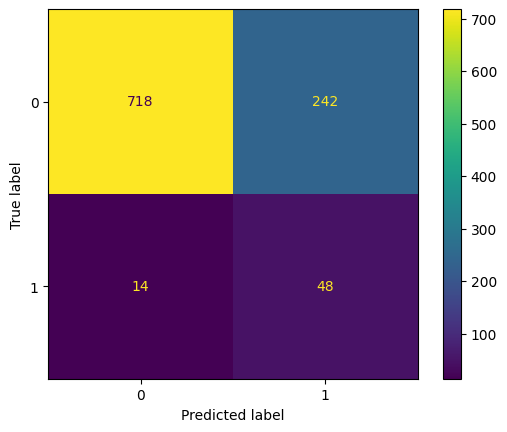

In [85]:

ConfusionMatrixDisplay(confusion_matrix=matrix3).plot();

In [86]:
true_neg3 = matrix3[0][0]
true_pos3 = matrix3[1][1]
false_pos3 =matrix3[0][1]
false_neg3 =matrix3[1][0]
Accuracy3 = (true_pos3 + true_neg3) / (true_pos3 + true_neg3 + false_pos3 + false_neg3)
print("\nAccuracy3:",Accuracy3)
specificity3= true_neg3 / (true_neg3 + false_pos3)
print("\nSpecificity3:",specificity3)
sensitivity3=  true_pos3 / (true_pos3 + false_neg3)
print("\nSensitivity3:",sensitivity3)


Accuracy3: 0.7495107632093934

Specificity3: 0.7479166666666667

Sensitivity3: 0.7741935483870968


**Model2**

In [139]:
## Baseline model with the best depth
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)
best_depth = None
best_score = 0.0

for depth in range(1, 12):
    decision = DecisionTreeClassifier(max_depth=depth)
    model    = decision.fit(X_train, y_train)
    score    = model.score(X_test, y_test)

    print(f"max_depth={depth:2d} => test accuracy = {score:.4f}")
    if score > best_score:
        best_score = score
        best_depth = depth

print("\n→ Best max_depth:", best_depth, " test accuracy:", best_score)

max_depth= 1 => test accuracy = 0.9393
max_depth= 2 => test accuracy = 0.9393
max_depth= 3 => test accuracy = 0.9403
max_depth= 4 => test accuracy = 0.9403
max_depth= 5 => test accuracy = 0.9384
max_depth= 6 => test accuracy = 0.9403
max_depth= 7 => test accuracy = 0.9344
max_depth= 8 => test accuracy = 0.9325
max_depth= 9 => test accuracy = 0.9286
max_depth=10 => test accuracy = 0.9237
max_depth=11 => test accuracy = 0.9286

→ Best max_depth: 3  test accuracy: 0.9403131115459883


In [140]:
#Training Set Performance Evaluation
y_train_pred = decision.predict(X_train)
matrix40 = confusion_matrix(y_train, y_train_pred)
matrix40

array([[3900,    1],
       [  65,  122]])

In [141]:
true_neg40 = matrix40[0][0]
true_pos40 = matrix40[1][1]
false_pos40 =matrix40[0][1]
false_neg40 =matrix40[1][0]
Accuracy40 = (true_pos40 + true_neg40) / (true_pos40 + true_neg40 + false_pos40 + false_neg40)
print("\nAccuracy40:",Accuracy40)
specificity40= true_neg40 / (true_neg40 + false_pos40)
print("\nSpecificity40:",specificity40)
sensitivity40=  true_pos40 / (true_pos40 + false_neg40)
print("\nSensitivity40:",sensitivity40)


Accuracy40: 0.9838551859099804

Specificity40: 0.9997436554729556

Sensitivity40: 0.6524064171122995


In [170]:
# Testing Set Performance Evaluation
y_pred4 = decision.predict(X_test)
matrix4= confusion_matrix(y_test, y_pred4)
matrix4

array([[942,  18],
       [ 55,   7]])

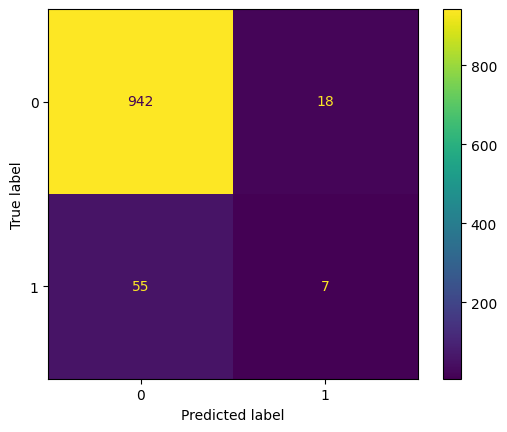

In [143]:

ConfusionMatrixDisplay(confusion_matrix=matrix4).plot();

In [145]:
true_neg4 = matrix4[0][0]
true_pos4 = matrix4[1][1]
true_neg4 = matrix4[0][0]
true_pos4 = matrix4[1][1]
false_pos4 =matrix4[0][1]
false_neg4 =matrix4[1][0]
Accuracy4= (true_pos4 + true_neg4) / (true_pos4 + true_neg4 + false_pos4 + false_neg4)
print("\nAccuracy4:",Accuracy4)
Specificity4= true_neg4 / (true_neg4 + false_pos4)
print("\nSpecificity4:",Specificity4)
sensitivity4=  true_pos4 / (true_pos4 + false_neg4)
print("\nSensitivity4:",sensitivity)


Accuracy4: 0.9285714285714286

Specificity4: 0.98125

Sensitivity4: 0.0


In [146]:
# Add A combine hyperparameter class_weight='balanced' and best max_depth
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)
decision2 = DecisionTreeClassifier(max_depth=depth, class_weight='balanced' )
decision2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=11)

In [151]:
#Training Set Performance Evaluation
y_train_pred50 = decision2.predict(X_train)
matrix50 = confusion_matrix(y_train, y_train_pred50)
matrix50

array([[3306,  595],
       [   0,  187]])

In [152]:
true_neg50 = matrix50[0][0]
true_pos50 = matrix50[1][1]
false_pos50 =matrix50[0][1]
false_neg50 =matrix50[1][0]
Accuracy50 = (true_pos50 + true_neg50) / (true_pos50 + true_neg50 + false_pos50 + false_neg50)
print("\nAccuracy50:",Accuracy50)
specificity50= true_neg50 / (true_neg50 + false_pos50)
print("\nSpecificity50:",specificity50)
sensitivity50=  true_pos50 / (true_pos50 + false_neg50)
print("\nSensitivity50:",sensitivity50)


Accuracy50: 0.8544520547945206

Specificity50: 0.8474750064086132

Sensitivity50: 1.0


In [172]:
# Testing Set Performance Evaluation
y_pred5 = decision2.predict(X_test)
matrix5= confusion_matrix(y_test, y_pred5)
matrix5

array([[811, 149],
       [ 30,  32]])

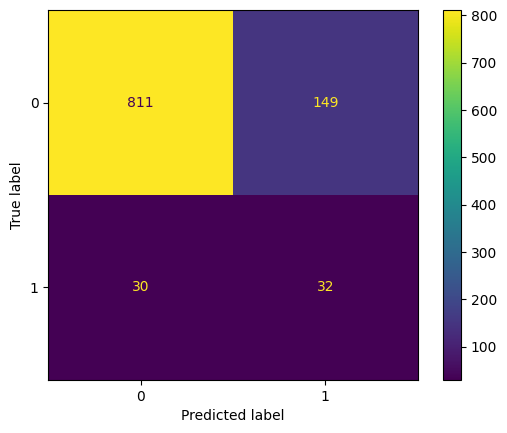

In [154]:

ConfusionMatrixDisplay(confusion_matrix=matrix5).plot();

In [157]:
true_neg5 = matrix5[0][0]
true_pos5 = matrix5[1][1]
false_pos5 =matrix5[0][1]
false_neg5 =matrix5[1][0]
Accuracy5= (true_pos5 + true_neg5) / (true_pos5 + true_neg5 + false_pos5 + false_neg5)
print("\nAccuracy5:",Accuracy5)
specificity5= true_neg5 / (true_neg5 + false_pos5)
print("\nSpecificity5:",specificity5)
sensitivity5=  true_pos5 / (true_pos5 + false_neg5)
print("\nSensitivity5:",sensitivity5)


Accuracy5: 0.824853228962818

Specificity5: 0.8447916666666667

Sensitivity5: 0.5161290322580645


In [158]:
best_split=None; best_score=0
for split in [2, 5, 10, 20]:
    decision3=DecisionTreeClassifier(max_depth=depth, class_weight='balanced', min_samples_split=split)

In [160]:
# Add A combine hyperparameter class_weight='balanced',best max_depth,min_samples_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

# added `min_samples_split
decision3 = DecisionTreeClassifier(
    max_depth=depth,
    class_weight='balanced',
    min_samples_split=split
)
decision3.fit(X_train, y_train)

# evaluate
print("Test accuracy:", decision.score(X_test, y_test))

Test accuracy: 0.9285714285714286


In [161]:
#Training Set Performance Evaluation
y_train_pred60 = decision3.predict(X_train)
matrix60 = confusion_matrix(y_train, y_train_pred60)
matrix60

array([[3188,  713],
       [   0,  187]])

In [162]:
true_neg60 = matrix60[0][0]
true_pos60 = matrix60[1][1]
false_pos60 =matrix60[0][1]
false_neg60 =matrix60[1][0]
Accuracy60 = (true_pos60 + true_neg60) / (true_pos60 + true_neg60 + false_pos60 + false_neg60)
print("\nAccuracy60:",Accuracy60)
specificity60= true_neg60 / (true_neg60 + false_pos60)
print("\nSpecificity60:",specificity60)
sensitivity60=  true_pos60 / (true_pos60 + false_neg60)
print("\nSensitivity60:",sensitivity60)


Accuracy60: 0.825587084148728

Specificity60: 0.8172263522173802

Sensitivity60: 1.0


In [173]:
# Testing Set Performance Evaluation
y_pred6 = decision3.predict(X_test)
matrix6= confusion_matrix(y_test, y_pred6)
matrix6

array([[785, 175],
       [ 27,  35]])

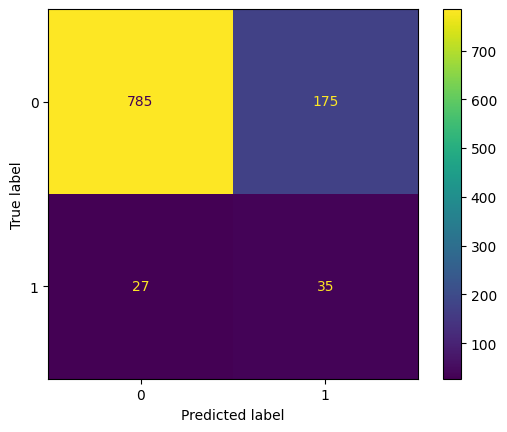

In [164]:

ConfusionMatrixDisplay(confusion_matrix=matrix6).plot();

In [165]:
true_neg6 = matrix6[0][0]
true_pos6 = matrix6[1][1]
false_pos6 =matrix6[0][1]
false_neg6 =matrix6[1][0]
Accuracy6= (true_pos6 + true_neg6) / (true_pos6 + true_neg6 + false_pos6 + false_neg6)
print("\nAccuracy6:",Accuracy6)
specificity6= true_neg6 / (true_neg6 + false_pos6)
print("\nSpecificity6:",specificity6)
sensitivity6=  true_pos6 / (true_pos6 + false_neg6)
print("\nSensitivity6:",sensitivity6)



Accuracy6: 0.8023483365949119

Specificity6: 0.8177083333333334

Sensitivity6: 0.5645161290322581


**Milestone9**

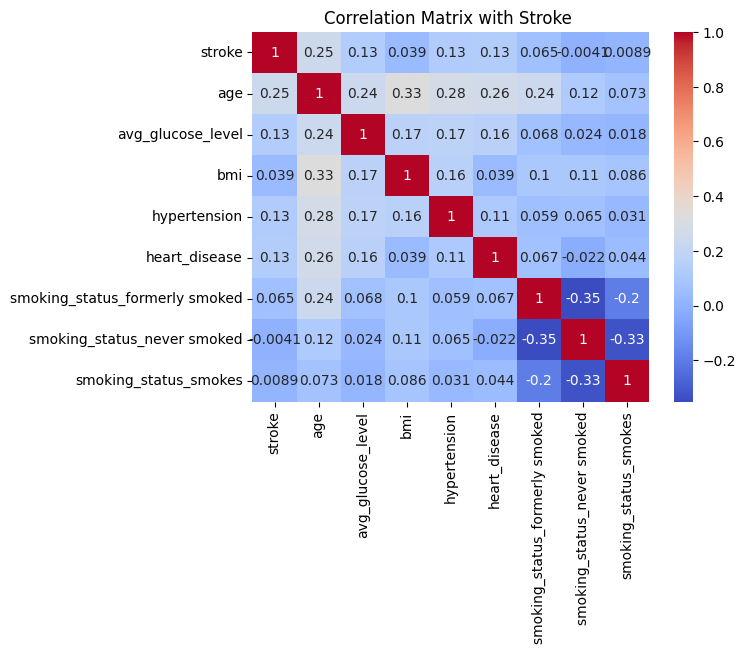

In [31]:
# Heatmap
#Correlation matrix
corr = stroke2_dummies[['stroke', 'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
                     'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Stroke ')
plt.savefig('correlation_matrix_with_stroke.png')
plt.show()

In [ ]:
#Bonus Analysis

In [51]:
# 1. Principal Component Analysis (PCA)
#  Fit PCA (2 components)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

In [52]:
print("Explained variance ratios:", pca.explained_variance_ratio_)

Explained variance ratios: [0.23455205 0.17434341]


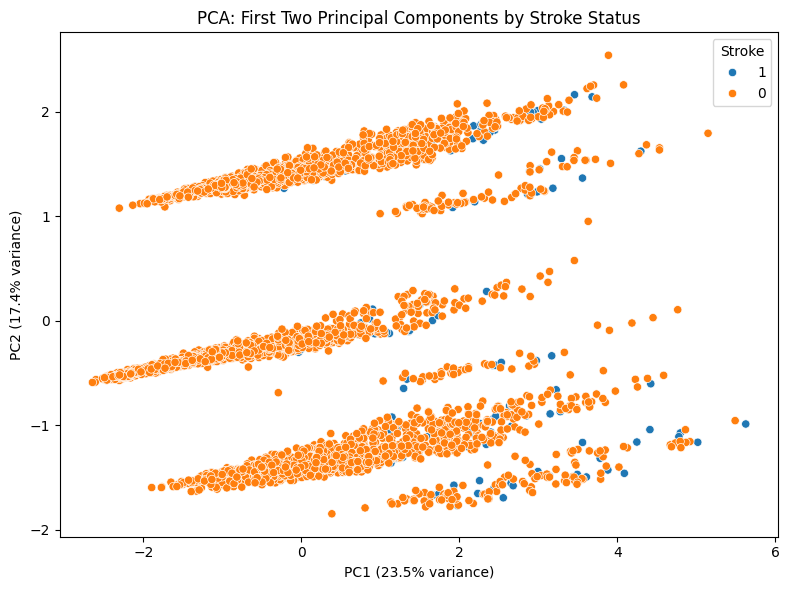

In [53]:

# Build a DataFrame for plotting
Stroke_pca = pd.DataFrame(pcs, columns=["PC1", "PC2"])
Stroke_pca["stroke"] = y.values.astype(str)  # convert to string for hue

# Scatterplot of PC1 vs PC2 colored by stroke status
plt.figure(figsize=(8,6))
sns.scatterplot(data=Stroke_pca, x="PC1", y="PC2", hue="stroke")

plt.title("PCA: First Two Principal Components by Stroke Status")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

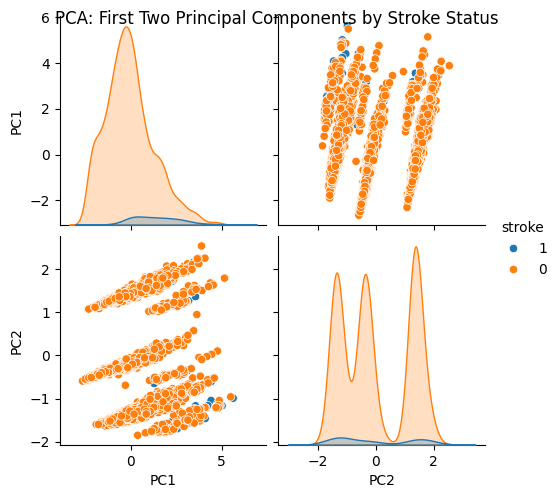

In [54]:
# 2.Pairplot Graph
sns.pairplot(Stroke_pca, hue="stroke")
plt.suptitle("PCA: First Two Principal Components by Stroke Status")
plt.show()